In [1]:
import pandas as pd
import numpy as np 
import scipy.interpolate
import matplotlib.pyplot as plt

In [2]:
hist_bond_yields = pd.read_csv('hist_bond_yields.csv')
hs_stock_var = pd.read_csv('HS_port4_stock_price.csv')

In [3]:
hist_bond_yields.tail()

,Date,0,30.41666667,60.83333333,91.25,182.5,273.75,365,730,1095,1460,1825,2190,2555,2920,3285
2757,29/07/2019,1.0349,1.0344,1.0340,1.0436,0.9983,0.9541,0.9374,0.8470,0.8931,1.0152,1.0795,1.1633,1.2453,1.3240,1.3982
2758,30/07/2019,1.0349,1.0243,1.0239,1.0335,0.9842,0.9340,0.9109,0.8337,0.8797,1.0010,1.0645,1.1502,1.2326,1.3132,1.3901
2759,31/07/2019,1.0450,1.0445,1.0440,1.0436,1.0072,0.9522,0.9213,0.8397,0.8842,1.0009,1.0596,1.1410,1.2233,1.3026,1.3779
2760,1/08/2019,1.0551,1.0445,1.0340,1.0436,1.0132,0.9432,0.9168,0.8104,0.8464,0.9563,1.0115,1.0876,1.1640,1.2406,1.3111
2761,2/08/2019,1.0449,1.0344,1.0138,1.0335,0.9978,0.9295,0.9044,0.7954,0.8295,0.9346,0.9839,1.0598,1.1356,1.2091,1.2804


In [4]:
#store array X of given yield maurities in days 
X = [0,30.41666667,60.83333333,91.25,182.5,273.75,365,730,1095,1460,1825,2190,2555,2920,3285]

#Array of yields needed to be interpreted 
tointerp = [77, 105, 166, 260, 290, 348, 446, 474, 532, 628, 655, 713, 811, 842, 897, 993, 1023, 1078,1176,1207, 1358]


In [5]:
df = []

#to loop through hist_bond_yields 
Dateindex = list(range(0,2762))

#interp function 
for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, hist_bond_yields.iloc[row, 1:], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

In [6]:
interp_yields = pd.DataFrame(df, columns = tointerp)

In [7]:
interp_yields.head(10)

,77,105,166,260,290,348,446,474,532,628,...,713,811,842,897,993,1023,1078,1176,1207,1358
0,4.352182,4.201593,3.877708,3.440607,3.367042,3.325791,3.363676,3.380952,3.416737,3.475967,...,3.528411,3.613620,3.642216,3.692952,3.781508,3.809182,3.859918,3.951740,3.980880,4.122820
1,4.146084,3.966893,3.760128,3.404562,3.343778,3.316574,3.365500,3.385169,3.425912,3.493348,...,3.553058,3.638544,3.666690,3.716627,3.803790,3.831028,3.880965,3.971386,4.000084,4.139873
2,4.174082,4.017173,3.770833,3.430551,3.372544,3.338793,3.413362,3.442559,3.503038,3.603141,...,3.691773,3.789923,3.820702,3.875310,3.970627,4.000413,4.055021,4.141005,4.167453,4.296279
3,4.196172,4.062419,3.846897,3.443268,3.372544,3.338793,3.419531,3.450861,3.515757,3.623172,...,3.718279,3.821296,3.853442,3.910477,4.010027,4.041137,4.098171,4.188456,4.216262,4.351707
4,4.178940,4.033904,3.823195,3.439893,3.372490,3.338548,3.418765,3.449933,3.514496,3.621359,...,3.715976,3.811905,3.841377,3.893664,3.984930,4.013451,4.065738,4.152781,4.179908,4.312043
5,4.205455,4.072326,3.824449,3.438567,3.372544,3.338793,3.403265,3.428971,3.482220,3.570356,...,3.648393,3.735213,3.762468,3.810823,3.895224,3.921599,3.969954,4.053228,4.079379,4.206757
6,4.180786,4.048682,3.826341,3.439893,3.372544,3.338793,3.385067,3.404483,3.444702,3.511271,...,3.570212,3.650928,3.677307,3.724110,3.805802,3.831331,3.878134,3.961639,3.988061,4.116762
7,4.137168,3.980523,3.749492,3.427959,3.372544,3.338793,3.361433,3.372679,3.395975,3.434532,...,3.468672,3.539834,3.564456,3.608139,3.684387,3.708214,3.751898,3.833773,3.859940,3.987401
8,4.130201,3.968990,3.725392,3.423815,3.372544,3.338793,3.359591,3.370201,3.392177,3.428552,...,3.460759,3.529981,3.554008,3.596636,3.671043,3.694295,3.736924,3.819649,3.846267,3.975920
9,4.117579,3.958901,3.701598,3.419671,3.372490,3.338548,3.336789,3.339619,3.345483,3.355188,...,3.363781,3.425307,3.448196,3.488805,3.559688,3.581838,3.622448,3.705925,3.733069,3.865287


In [8]:
interp_returns = pd.read_csv('bond_return_series.csv')
interp_returns.head()

,77,105,166,260,290,348,446,474,532,628,...,713,811,842,897,993,1023,1078,1176,1207,1358
0,0.000435,0.000675,0.000535,0.000257,1.848400e-04,0.000088,-0.000022,-0.000055,-0.000134,-0.000299,...,-0.000481,-0.000554,-0.000565,-0.000582,-0.000606,-0.000612,-0.000622,-0.000633,-0.000635,-0.000634
1,-0.000059,-0.000145,-0.000049,-0.000185,-2.285500e-04,-0.000212,-0.000585,-0.000745,-0.001124,-0.001889,...,-0.002710,-0.003364,-0.003553,-0.003900,-0.004539,-0.004747,-0.005141,-0.005465,-0.005535,-0.005819
2,-0.000047,-0.000130,-0.000346,-0.000091,0.000000e+00,0.000000,-0.000075,-0.000108,-0.000185,-0.000345,...,-0.000518,-0.000697,-0.000755,-0.000864,-0.001072,-0.001141,-0.001274,-0.001529,-0.001614,-0.002062
3,0.000036,0.000082,0.000108,0.000024,4.200000e-07,0.000002,0.000009,0.000012,0.000018,0.000031,...,0.000045,0.000209,0.000278,0.000413,0.000683,0.000776,0.000958,0.001149,0.001202,0.001476
4,-0.000056,-0.000111,-0.000006,0.000009,-4.200000e-07,-0.000002,0.000189,0.000272,0.000470,0.000878,...,0.001320,0.001704,0.001820,0.002036,0.002440,0.002574,0.002829,0.003207,0.003324,0.003917


In [9]:
#export_excel = interp_yields.to_excel (r'C:\Users\Mat\Documents\export_dataframe.xlsx', index = None, header=True)

In [10]:
bond_cov_matrix = interp_returns.cov() 
bond_cov_matrix

,77,105,166,260,290,348,446,474,532,628,...,713,811,842,897,993,1023,1078,1176,1207,1358
77,1.904993e-09,2.762609e-09,4.126449e-09,3.390834e-09,3.201082e-09,3.870240e-09,5.247251e-09,5.678155e-09,6.608901e-09,8.262480e-09,...,9.844233e-09,1.105144e-08,1.137403e-08,1.192828e-08,1.284023e-08,1.311077e-08,1.358884e-08,1.452135e-08,1.481523e-08,1.618136e-08
105,2.762609e-09,4.204854e-09,6.536822e-09,5.028025e-09,4.619328e-09,5.684243e-09,7.989281e-09,8.730124e-09,1.035468e-08,1.331013e-08,...,1.620430e-08,1.833483e-08,1.889847e-08,1.987362e-08,2.149950e-08,2.198773e-08,2.285822e-08,2.446241e-08,2.496241e-08,2.729149e-08
166,4.126449e-09,6.536822e-09,1.270040e-08,8.864767e-09,7.684674e-09,9.982437e-09,1.474076e-08,1.627654e-08,1.968721e-08,2.601234e-08,...,3.232024e-08,3.700439e-08,3.826301e-08,4.046781e-08,4.422963e-08,4.538264e-08,4.746854e-08,5.102692e-08,5.212158e-08,5.726966e-08
260,3.390834e-09,5.028025e-09,8.864767e-09,5.910017e-08,7.653664e-08,9.932333e-08,1.189858e-07,1.223713e-07,1.278494e-07,1.323668e-07,...,1.316319e-07,1.451579e-07,1.505779e-07,1.601707e-07,1.768430e-07,1.820345e-07,1.915292e-07,2.080418e-07,2.132114e-07,2.381614e-07
290,3.201082e-09,4.619328e-09,7.684674e-09,7.653664e-08,1.005649e-07,1.312358e-07,1.560780e-07,1.599687e-07,1.658078e-07,1.688916e-07,...,1.647736e-07,1.810412e-07,1.878648e-07,1.999538e-07,2.210010e-07,2.275642e-07,2.395795e-07,2.604573e-07,2.669978e-07,2.986172e-07
348,3.870240e-09,5.684243e-09,9.982437e-09,9.932333e-08,1.312358e-07,1.745059e-07,2.068361e-07,2.112956e-07,2.173289e-07,2.178180e-07,...,2.083679e-07,2.281737e-07,2.369045e-07,2.523964e-07,2.794417e-07,2.878946e-07,3.033933e-07,3.300775e-07,3.384234e-07,3.788155e-07
446,5.247251e-09,7.989281e-09,1.474076e-08,1.189858e-07,1.560780e-07,2.068361e-07,2.575658e-07,2.682772e-07,2.884137e-07,3.156623e-07,...,3.334610e-07,3.735878e-07,3.878536e-07,4.131613e-07,4.573268e-07,4.711264e-07,4.964231e-07,5.393253e-07,5.526716e-07,6.170420e-07
474,5.678155e-09,8.730124e-09,1.627654e-08,1.223713e-07,1.599687e-07,2.112956e-07,2.682772e-07,2.815253e-07,3.076174e-07,3.468002e-07,...,3.773269e-07,4.253500e-07,4.415667e-07,4.703306e-07,5.205136e-07,5.361897e-07,5.649215e-07,6.134896e-07,6.285788e-07,7.012827e-07
532,6.608901e-09,1.035468e-08,1.968721e-08,1.278494e-07,1.658078e-07,2.173289e-07,2.884137e-07,3.076174e-07,3.478091e-07,4.155552e-07,...,4.768105e-07,5.432113e-07,5.638659e-07,6.004912e-07,6.643584e-07,6.843010e-07,7.208428e-07,7.822645e-07,8.013040e-07,8.928835e-07
628,8.262480e-09,1.331013e-08,2.601234e-08,1.323668e-07,1.688916e-07,2.178180e-07,3.156623e-07,3.468002e-07,4.155552e-07,5.419664e-07,...,6.670162e-07,7.698249e-07,7.990004e-07,8.507177e-07,9.408490e-07,9.689787e-07,1.020505e-06,1.106512e-06,1.133098e-06,1.260701e-06


In [11]:
Bond_PV = [3.891582e+05, 1.719906e+05, 1.144760e+05, 5.354038e+06, 2.270750e+05, 1.140076e+05, 1.632349e+05,
           2.261747e+05, 1.135766e+05, 1.626720e+05, 6.138007e+06, 1.132158e+05, 1.620823e+05, 5.521397e+04,
           1.127307e+05, 1.613600e+05, 5.496771e+04, 4.015601e+06, 1.605280e+05, 4.914197e+06, 5.960823e+06]


In [12]:
matrix_21x1 = Bond_PV
matrix_21x21 = bond_cov_matrix

result = matrix_21x21.dot(matrix_21x1)
variance = result.dot(matrix_21x1)

STD = np.sqrt(variance)
STD

31683.911326099664

In [13]:
chol = np.linalg.cholesky(bond_cov_matrix)
chol

array([[ 4.36462237e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.32954885e-05,  1.40902530e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.45430899e-05,  3.92236086e-05,  4.71541831e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e

In [14]:
rand_numbers = pd.DataFrame()
n_sims = 10000
for x in tointerp:
    rand_numbers[x] = np.random.normal(0, 1, n_sims)

In [15]:
sim = []
outtest = []
for x in list(range(0, n_sims)):
    outtest = chol.dot(np.array(rand_numbers.loc[x, :]))
    sim.append(outtest)
    
sim_returns = pd.DataFrame(sim)
sim_returns

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-6.098705e-06,-9.945939e-06,-0.000034,0.000315,0.000426,0.000511,6.284425e-04,0.000658,0.000716,0.000801,...,0.000865,0.001010,0.001063,0.001159,0.001335,0.001392,0.001500,0.001702,0.001769,0.002110
1,2.616841e-05,1.258544e-05,-0.000026,-0.000198,-0.000258,-0.000351,-4.318913e-04,-0.000447,-0.000472,-0.000501,...,-0.000512,-0.000591,-0.000622,-0.000679,-0.000784,-0.000818,-0.000882,-0.001059,-0.001122,-0.001455
2,4.005977e-05,5.135640e-05,0.000064,-0.000140,-0.000216,-0.000322,-2.705205e-04,-0.000227,-0.000113,0.000143,...,0.000441,0.000542,0.000554,0.000574,0.000602,0.000610,0.000623,0.000775,0.000836,0.001161
3,-1.703123e-05,-6.393851e-07,0.000035,-0.000002,-0.000010,0.000020,7.402989e-05,0.000092,0.000135,0.000221,...,0.000312,0.000373,0.000389,0.000418,0.000468,0.000484,0.000514,0.000768,0.000870,0.001423
4,-6.012120e-05,-1.116091e-04,-0.000208,-0.000035,0.000008,-0.000047,-1.572312e-04,-0.000195,-0.000284,-0.000462,...,-0.000652,-0.000776,-0.000808,-0.000865,-0.000966,-0.000998,-0.001056,-0.001046,-0.001031,-0.000927
5,2.243679e-05,3.556570e-05,0.000071,0.000224,0.000268,0.000306,3.950820e-04,0.000423,0.000483,0.000585,...,0.000679,0.000698,0.000693,0.000679,0.000638,0.000621,0.000583,0.000645,0.000674,0.000829
6,-2.661747e-05,-3.011196e-05,-0.000002,-0.000032,-0.000047,-0.000068,9.840558e-05,0.000174,0.000357,0.000737,...,0.001154,0.001377,0.001426,0.001513,0.001663,0.001709,0.001793,0.001944,0.001992,0.002221
7,6.926506e-05,1.089656e-04,0.000252,0.000358,0.000399,0.000542,5.024604e-04,0.000455,0.000327,0.000027,...,-0.000330,-0.000490,-0.000522,-0.000581,-0.000691,-0.000727,-0.000796,-0.000762,-0.000736,-0.000576
8,1.019128e-05,2.552876e-05,0.000063,-0.000142,-0.000198,-0.000198,-1.400215e-04,-0.000113,-0.000043,0.000113,...,0.000293,0.000395,0.000420,0.000465,0.000550,0.000578,0.000632,0.000601,0.000580,0.000448
9,2.896996e-05,3.993497e-05,0.000040,-0.000026,-0.000035,-0.000002,-9.366971e-05,-0.000139,-0.000246,-0.000468,...,-0.000709,-0.000924,-0.000990,-0.001113,-0.001344,-0.001421,-0.001567,-0.001852,-0.001947,-0.002447


In [16]:
sim_price = (1 + sim_returns) * Bond_PV 

In [17]:
sim_price['Portfolio'] = sim_price.sum(axis=1)
sim_price['PnL'] = sim_price['Portfolio'] -  28885130.12625402 #mtm 

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


-50956.37144409511

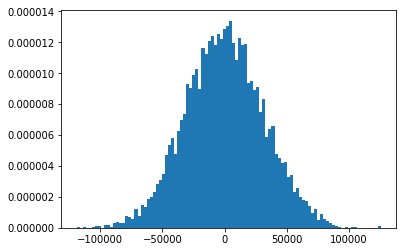

In [18]:
PnL = np.array(sim_price['PnL'])
PnL.sort()
plt.hist(PnL, normed = True, bins = 100)
np.percentile(PnL, 5)

In [19]:
##Historical simulation 

In [20]:
hist_port_returns = pd.DataFrame()

hist_port_returns = (1+interp_returns) * Bond_PV
    
hist_port_returns['Portfolio'] = hist_port_returns.sum(axis=1)
hist_port_returns['PnL'] = hist_port_returns['Portfolio'] -  28885130.12625402 #mtm 

-49741.02406445891

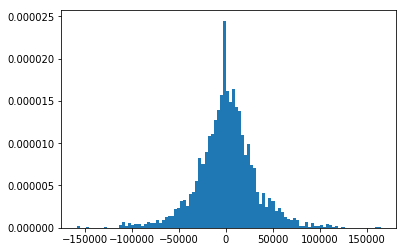

In [21]:
PnLH = np.array(hist_port_returns['PnL'])
PnLH.sort()
plt.hist(PnLH, normed = True, bins = 100)
np.percentile(PnLH, 5)

In [22]:
np.percentile(PnL, 1)

-72732.97642019592

In [45]:
np.percentile(PnLH, 5)

-49741.02406445891

In [24]:
cvar = PnL[PnL <= np.percentile(PnL, 5)].mean()

In [25]:
cvar

-64352.002403029546

In [26]:
cvarH = PnLH[PnLH <= np.percentile(PnLH, 5)].mean()

In [27]:
cvarH

-74011.82837571713

In [42]:
combined_HS_VAR = np.array(hist_port_returns['PnL']) + np.array(hs_stock_var.iloc[:,0])

In [43]:
np.percentile(combined_HS_VAR, 5)

-51455.70537926813

In [44]:
np.percentile(combined_HS_VAR, 1)

-88765.08421227489

array([ 29759.18107 ,  27039.07572 ,   1663.695913, ...,   3061.856872,
       -13228.90823 , -11636.7216  ])